In [9]:
!pip install --user pipwin

  Using cached https://files.pythonhosted.org/packages/08/0f/a7df1770d2dcf99898aee562d6ce866e5dc78a5ccbf4ff25231ece4c99e8/pipwin-0.5.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/66/25/ff030e2437265616a1e9b25ccc864e0371a0bc3adb7c5a404fd661c6f4f6/beautifulsoup4-4.9.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/5c/be/ea485e61e1e5c552fd1fdf90dc818e30661797085ca7df6483ca62923f3c/pySmartDL-1.3.3-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/1e/30/e76fb0c45da8aef49ea8d2a90d4e7a6877b45894c25f12fb961f009a891e/PyPrind-2.11.2-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/f4/6a/0385641ad1b52aae5c63820277a10e500c19e40fc4df5287f161aa287020/Js2Py-0.70-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/5d/94/d47b0fd5988e6b7059de05720a646a2930920fff247a826f61674d436ba4/tzlocal-2.1-py2.py3-none-any.whl


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [12]:
!C:\Users\anupk\AppData\Roaming\Python\Python37\Scripts\pipwin install PyAudio

Building cache. Hang on . . .
Done
Package `pyaudio` found in cache
https://download.lfd.uci.edu/pythonlibs/s2jqpv5t/PyAudio-0.2.11-cp37-cp37m-win_amd64.whl
PyAudio-0.2.11-cp37-cp37m-win_amd64.whl
[*] 0 bytes / 109 kB @ 0 bytes/s [------------------] [0.0%, 0s left]    [*] 0 bytes / 109 kB @ 0 bytes/s [------------------] [0.0%, 0s left]    [*] 0 bytes / 109 kB @ 0 bytes/s [------------------] [0.0%, 0s left]    [*] 0 bytes / 109 kB @ 0 bytes/s [------------------] [0.0%, 0s left]    [*] 0 bytes / 109 kB @ 0 bytes/s [------------------] [0.0%, 0s left]    [*] 0 bytes / 109 kB @ 0 bytes/s [------------------] [0.0%, 0s left]   

In [13]:
!pip install SpeechRecognition

In [20]:
!pip install textblob

In [2]:
import speech_recognition as sr

In [3]:
def recognize_speech_from_mic(recognizer, microphone):

    # check that recognizer and microphone arguments are appropriate type
    if not isinstance(recognizer, sr.Recognizer):
        raise TypeError("`recognizer` must be `Recognizer` instance")

    if not isinstance(microphone, sr.Microphone):
        raise TypeError("`microphone` must be `Microphone` instance")

    # adjust the recognizer sensitivity to ambient noise and record audio
    # from the microphone
    with microphone as source:
        recognizer.adjust_for_ambient_noise(source) # #  analyze the audio source for 1 second
        audio = recognizer.listen(source)

    # set up the response object
    response = {
        "success": True,
        "error": None,
        "transcription": None
    }

    # try recognizing the speech in the recording
    # if a RequestError or UnknownValueError exception is caught,
    #   update the response object accordingly
    try:
        response["transcription"] = recognizer.recognize_google(audio)
    except sr.RequestError:
        # API was unreachable or unresponsive
        response["success"] = False
        response["error"] = "API unavailable/unresponsive"
    except sr.UnknownValueError:
        # speech was unintelligible
        response["error"] = "Unable to recognize speech"

    return response


In [4]:
recognizer = sr.Recognizer()

In [14]:
mic = sr.Microphone(device_index=1)

In [17]:
response = recognize_speech_from_mic(recognizer, mic)

In [18]:
print('\nSuccess : {}\nError   : {}\n\nText from Speech\n{}\n\n{}' \
          .format(response['success'],
                  response['error'],
                  '-'*17,
                  response['transcription']))


Success : True
Error   : None

Text from Speech
-----------------

hello hello hello


In [27]:
temp_str = ''
records_all = []
while (temp_str != 'bye'):
    print('Speak it out')
    response = recognize_speech_from_mic(recognizer, mic)
    if response['success']:
        temp_str = response['transcription']
        print('You said :' ,temp_str )
        if (temp_str != 'bye'):
            records_all.append(temp_str)
print('Thanks for your suggetions')
print('Your suggetions on given Movies')
print(records_all)

Speak it out
You said : film is good
Speak it out
You said : film is very nice
Speak it out
You said : games look like boring
Speak it out
You said : bhai
Speak it out
You said : bye
Thanks for your suggetions
Your suggetions on given Movies
['film is good', 'film is very nice', 'games look like boring', 'bhai']


In [28]:
from textblob import TextBlob

In [29]:
def get_sentiment(sentx):
        '''
        Utility function to classify sentiment of passed tweet
        using textblob's sentiment method
        '''
        # create TextBlob object of passed text
        analysis = TextBlob(sentx)
        # set sentiment
        if analysis.sentiment.polarity > 0:
            return ('positive')
        elif analysis.sentiment.polarity == 0:
            return ('neutral')
        else:
            return ('negative')

In [35]:
# Select from collection
sentimets_total = {'neutral': 0 , 'positive' : 0 , 'negative':0}
for recd_sent in records_all:
    sentiment = get_sentiment(recd_sent)
    print (sentiment,'===>',recd_sent)
    sentimets_total[sentiment] = sentimets_total[sentiment] + 1
    print('###########################################')
print(sentimets_total)

positive ===> film is good
###########################################
positive ===> film is very nice
###########################################
negative ===> games look like boring
###########################################
neutral ===> bhai
###########################################
{'neutral': 1, 'positive': 2, 'negative': 1}


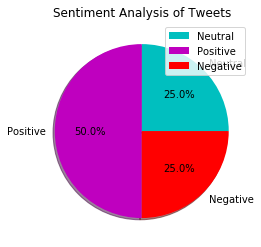

In [36]:
from matplotlib import pyplot as plt
slices = [sentimets_total['neutral'],sentimets_total['positive'],sentimets_total['negative']]
activities = ['Neutral','Positive','Negative']
cols = ['c','m','r',]

plt.pie(slices,
        labels=activities,
        colors=cols,
        shadow= True,
        autopct='%1.1f%%')

plt.title('Sentiment Analysis of Tweets')
plt.legend()
plt.show()